# Final Project: Projection of Flood Vulnerability across New York City



## 1. Introduction

Flood resilience is a critical part of urban resilience, environmental justice, and climate adaptation. New York City is a coastal metropolis with over 520 miles of shoreline and more than 400,000 residents living in flood-prone areas (NYC gov, 2013). Therefore it is facing tremendous impact from hurricanes, flooding, sea level rising. As global warming and extreme weather perform, the risks are rising. Natural disasters will lead to huge economic losses for households and the government. So it is of high importance to investigate the factors contributing to urban flooding and the recovery solutions. 

The Flood Susceptibility to Harm and Recovery Index (FSHRI) measures the vulnerability and the recovery capacity after the flooding attack. This index is mainly related to the exposure to hazards, social sensitivity, adaptive capacity, recovery resources, and infrastructure resilience. The Flood Vulnerability Index (FVI) serves as a crucial metric for both the current and projected flood risks across different boroughs and neighborhoods. This analysis examines the spatial distribution of flood vulnerability, incorporating both storm surge and tidal flooding projections up to the 2050s and the 2080s. From the visualization, this study concludes that apart from climatological factors, social development conditions can also be a crucial component behind the vulnerability level. In city sprawling, it is much more important for the city to make plans based on current development and make vegetation recovery as well. This study provides data-based anticipation of flood vulnerability and recovery level. Therefore, this research provides some policy-based findings and solutions. 


## 2. Research Questions:
- Are certain boroughs or neighborhoods more vulnerable to flooding than others in New York City?
- What are the factors contributing to the lack of flood resistance up to the 2050s, socioeconomic factors or climate factors?

### Hypothesis:
- Coastal areas are more vulnerable and have a lower capacity to recover, which refers to a higher risk of FSHRI. 
- The vulnerability and recovering capacity are closely related to the proximity of storms occurring in New York City.
- Wetland especially the coastal marsh and emergents play a crucial role in safeguarding against the flood attaction.


## 3. Load the data

Data involved in this research:
They mainly come from New York City Opendata website and NOAA.
- New_York_City_s_Flood_Vulnerability_Index: https://data.cityofnewyork.us/Environment/New-York-City-s-Flood-Vulnerability-Index/mrjc-v9pm/about_data
- Housing data: https://www.nyc.gov/site/planning/data-maps/open-data/dwn-housing-database.page#housingdevelopmentproject
- Wetland categories: https://data.cityofnewyork.us/dataset/NYC-Wetlands/p48c-iqtu/about_data
- Storm events: https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/

First load the data of FSHRI and FVI indexes. Other sources will be loaded in the following steps.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
import warnings
import numpy as np
from cartopy import crs as ccrs, feature as cfeature
import cartopy.io.shapereader as shpreader

## Flood vulnerbility Index (FVI)
df = pd.read_csv('New_York_City_s_Flood_Vulnerability_Index_20241203.csv')
print(df.head())

                                            the_geom        GEOID  FSHRI  \
0  MULTIPOLYGON (((-73.860344 40.83329400000001, ...  36005009200    4.0   
1  MULTIPOLYGON (((-73.873954 40.83423700000001, ...  36005006400    5.0   
2  MULTIPOLYGON (((-73.888319 40.84517900000001, ...  36005036501    3.0   
3  MULTIPOLYGON (((-73.908225 40.816203, -73.9075...  36005007900    4.0   
4  MULTIPOLYGON (((-73.920958 40.855112, -73.9200...  36005024700    1.0   

   FVI_storm_surge_present  FVI_storm_surge_2050s  FVI_storm_surge_2080s  \
0                      NaN                    NaN                    NaN   
1                      NaN                    NaN                    5.0   
2                      NaN                    NaN                    NaN   
3                      NaN                    NaN                    NaN   
4                      NaN                    NaN                    NaN   

   FVI_tidal_2020s  FVI_tidal_2050s  FVI_tidal_2080s  
0              NaN             

Check missing values:

In [2]:
print("Data Info:") #FVI
print(df.info())

print("\nMissing Values Count:")
print(df.isna().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   the_geom                 2209 non-null   object 
 1   GEOID                    2209 non-null   int64  
 2   FSHRI                    2207 non-null   float64
 3   FVI_storm_surge_present  361 non-null    float64
 4   FVI_storm_surge_2050s    517 non-null    float64
 5   FVI_storm_surge_2080s    612 non-null    float64
 6   FVI_tidal_2020s          78 non-null     float64
 7   FVI_tidal_2050s          87 non-null     float64
 8   FVI_tidal_2080s          173 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 155.4+ KB
None

Missing Values Count:
the_geom                      0
GEOID                         0
FSHRI                         2
FVI_storm_surge_present    1848
FVI_storm_surge_2050s      1692
FVI_storm_surge_2080s      1597
FVI_t

However, after testing the graphs and charts, the missing values are not meaningless in the research afterward because they comprise the regions that are not counted in the graph. These values should not be eliminated in plot making. However, in calculating indexes, the study applies the cleaned data which can make the bar chart results more pronouced.

## 4. Plot Indexes




### (1) New York City Map


In [3]:
projPC = ccrs.PlateCarree()
lonW = -74.25
lonE = -73.70
latS = 40.47
latN = 40.92
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '10m'

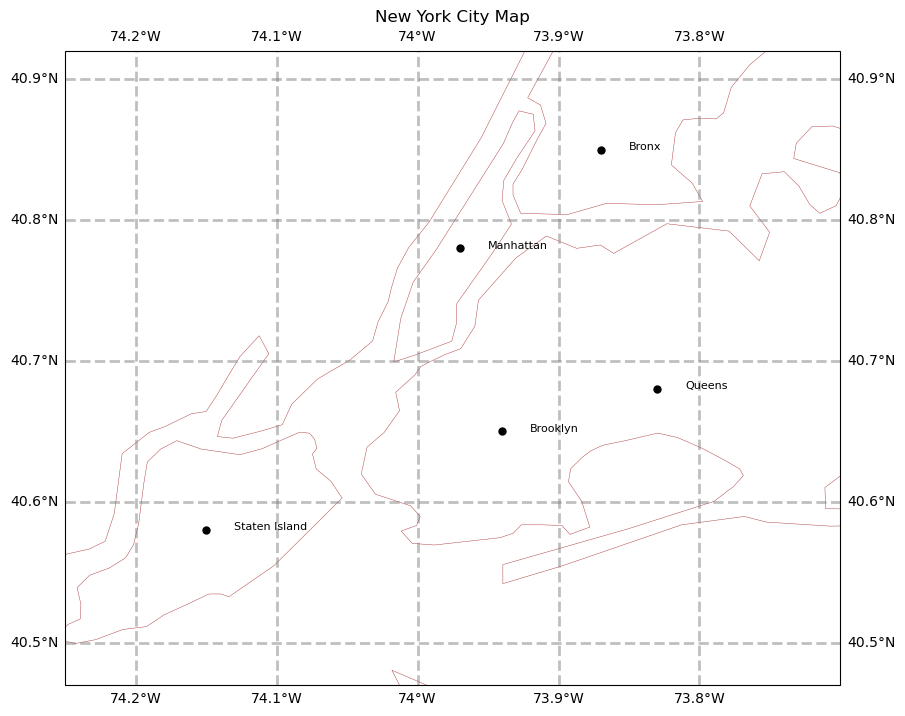

In [63]:
# Borough coordinates
boroughs = {
    'Manhattan': [-73.97, 40.78],
    'Brooklyn': [-73.94, 40.65],
    'Queens': [-73.83, 40.68],
    'Bronx': [-73.87, 40.85],
    'Staten Island': [-74.15, 40.58]
}

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('New York City Map')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')

#add names
for borough, coords in boroughs.items():
    ax.plot(coords[0], coords[1], 'ko', markersize=5, transform=projPC)
    ax.text(coords[0] + 0.02, coords[1], borough, 
            transform=projPC, fontsize=8)


plt.savefig('nyc_map.png', dpi=300, bbox_inches='tight')


The following research will be framed inside this area.

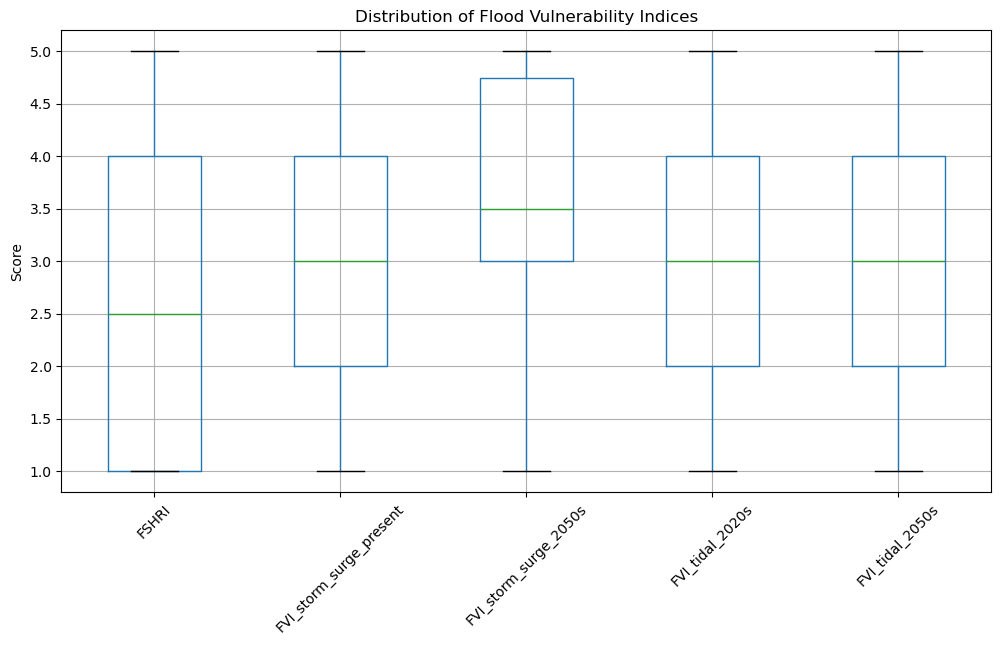

In [122]:
## basic indexes - general plot

plt.figure(figsize=(12, 6))
columns_to_plot = ['FSHRI', 'FVI_storm_surge_present', 'FVI_storm_surge_2050s', 
                   'FVI_tidal_2020s',
                   'FVI_tidal_2050s']

# Box plot
df_clean[columns_to_plot].boxplot()
plt.title('Distribution of Flood Vulnerability Indices')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.show()


### (2) FSHRI (Flood Susceptibility to Harm and Recovery Index)

#### a. Basic Statistics

In [4]:
df['FSHRI']

0       4.0
1       5.0
2       3.0
3       4.0
4       1.0
       ... 
2204    3.0
2205    4.0
2206    2.0
2207    5.0
2208    1.0
Name: FSHRI, Length: 2209, dtype: float64

Add risk level to the FSHRI categories.



In [3]:
# Add risk level categories
risk_levels = {
    'Very Low': (1, 2),'Low': (2, 3),'Medium': (3, 4),'High': (4, 5),'Very High': (5, 6)}

# Value
print("\nFSHRI Score Distribution:")
print(df['FSHRI'].value_counts().sort_index())

# Calculate risk percentage
df['Risk_Level'] = pd.cut(df['FSHRI'], 
                         bins=[0, 2, 3, 4, 5, 6],
                         labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

risk_distribution = df['Risk_Level'].value_counts(normalize=True) * 100

print("\nRisk Level Distribution:")
for level, percentage in risk_distribution.items():
    print(f"{level}: {percentage:.1f}%")
    


FSHRI Score Distribution:
FSHRI
1.0    441
2.0    441
3.0    442
4.0    441
5.0    442
Name: count, dtype: int64

Risk Level Distribution:
Very Low: 40.0%
Low: 20.0%
High: 20.0%
Medium: 20.0%
Very High: 0.0%


The Flood Susceptibility to Harm and Recovery Index (FSHRI) is a comprehensive measure that assesses how vulnerable different areas are to flood impacts and their capacity to recover from flooding events. The index is calculated by combining various socioeconomic indicators and flood exposure assessments (NYCOpendata, 2024).

The FSHRI uses a 1-5 scale, where:

1. Very Low Risk: 40.0%. 40% areas in New York City are under a very low risk level. This refers to the minimal flood vulnerability with a strong recovery capacity.
2. Low Risk: 20.0% of areas. Limited vulnerability with good recovery potential. This means low vulnerability and low recovery ability.
3. Medium Risk: 20.0% of areas. Moderate vulnerability, referring to high vulnerability and high recovery ability.
4. High Risk: 20.0% of areas. Significant vulnerability, meaning high vulnerability and low recovery.
5. Very High Risk: None. Extreme vulnerability, meaning low vulnerability and low recovery ability.


#### b. FSHRI plot

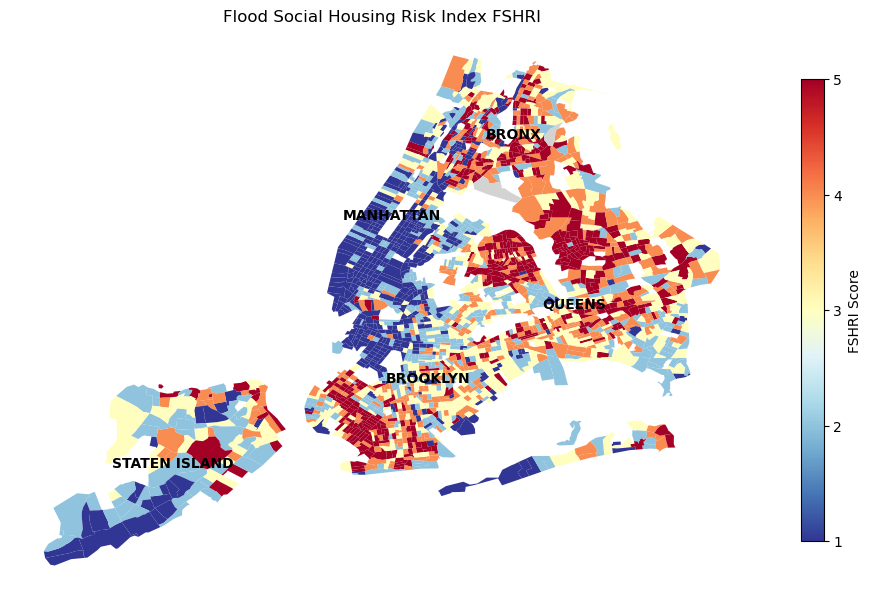

In [6]:
df['geometry'] = df['the_geom'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df, geometry='geometry')

#plot!
fig, ax = plt.subplots(figsize=(12, 12))

gdf.plot(column='FSHRI', ax=ax, legend=True, 
        legend_kwds={'label': 'FSHRI Score', 'ticks': [1, 2, 3, 4, 5], 'shrink': 0.5},
        missing_kwds={'color': 'lightgrey'},
        cmap='RdYlBu_r')
ax.set_title('Flood Social Housing Risk Index FSHRI')
ax.axis('off')
borough_name = {
    'MANHATTAN': (-73.97, 40.783),
    'BROOKLYN': (-73.94, 40.65),
    'QUEENS': (-73.82, 40.71),
    'BRONX': (-73.87, 40.85),
    'STATEN ISLAND': (-74.15, 40.58)
}

for borough, coords in borough_name.items():
    ax.annotate(text=borough,xy=coords,fontsize=10,fontweight='bold',ha='center',va='center',color='Black')

plt.show()

##### Key findings:
- Manhattan shows concentrated blue areas, particularly in its western sections, which means low risks of flood recovery.
- The Bronx and Queens display several high-risk areas (red and orange), especially in the northwest part.
- In the central part of Queens, it shows a rather high level of flood vulnerability adjacent to the riverside.
- In Brooklyn, flood resilience variation is quite mixed. The southwest side shows high volume of FSHRI index.
- Staten Island also shows a mix of risk levels. The lower south has a lower risk. There is a high-risk point in the central part.
- Long island and Jamaica Bay area also shows higher risk levels in the west.


### (4) Predictions of Flood vulnerability index (FVI) for a storm surge event estimated up to 2050s

#### a. Basic Indexes

In [7]:
df['FVI_storm_surge_2050s']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2204    NaN
2205    NaN
2206    NaN
2207    NaN
2208    1.0
Name: FVI_storm_surge_2050s, Length: 2209, dtype: float64

#### b. Plot
Now make two plots showing the predicted vulnerbility index at the present and in the 2050s.

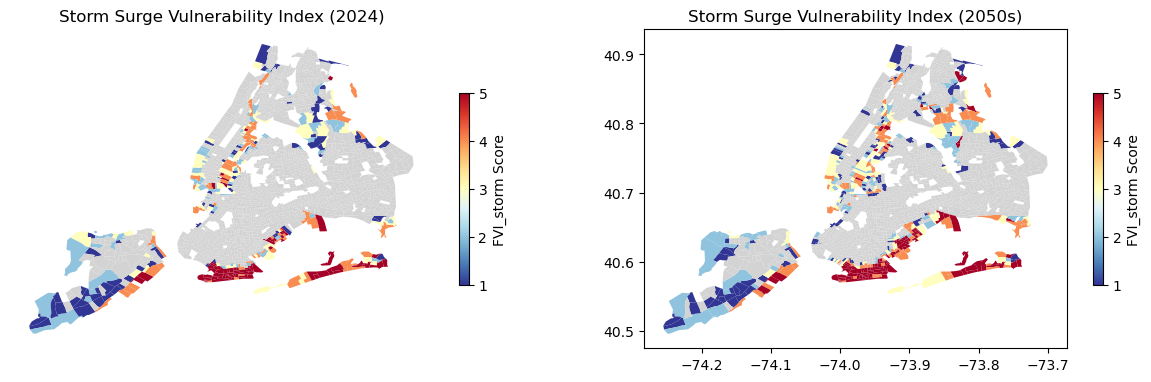

In [8]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

#plot!
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 25))

#present
gdf.plot(column='FVI_storm_surge_present', ax=ax1, legend=True,
        legend_kwds={'label': 'FVI_storm Score', 'ticks': [1, 2, 3, 4, 5], 'shrink': 0.1},
        missing_kwds={'color': 'lightgrey'},
        cmap='RdYlBu_r')
ax1.set_title('Storm Surge Vulnerability Index (2024)')
ax1.axis('off')

#2050
gdf.plot(column='FVI_storm_surge_2050s', ax=ax2, legend=True,
        legend_kwds={'label': 'FVI_storm Score', 'ticks': [1, 2, 3, 4, 5], 'shrink': 0.1},
        missing_kwds={'color': 'lightgrey'},
        cmap='RdYlBu_r')
ax2.set_title('Storm Surge Vulnerability Index (2050s)')
plt.show()


##### Key Findings:
- In total, the vulnerable areas are expanding, especially along the long island, at the east side of Manhattan, and river side of Queens.
- There are more high-risk areas on the south coast of Brooklyn.
- At the west side of Manhattan, the the level of risk decreases based on the 2050s predition.
- At the east side of Bronx, there is a small area that has higher vulnerability exceeding 4.
- At the east side of Queens, it shows that the risk of flood is very high.

### (4) Predictions of Flood vulnerability index (FVI) for a tidal surge event estimated up to 2050s

Because there is no newly updated data for FVI-tidal, this study compares the level in 2020 to the estimated situation in 2050s.
Flood vulnerability index (FVI) refers to the vulnerability index for a tidal flooding event under sea level conditions estimated for the 2020s (based on the daily tidal floodplains developed by the New York Panel on Climate Change) (NYCgov, 2024).

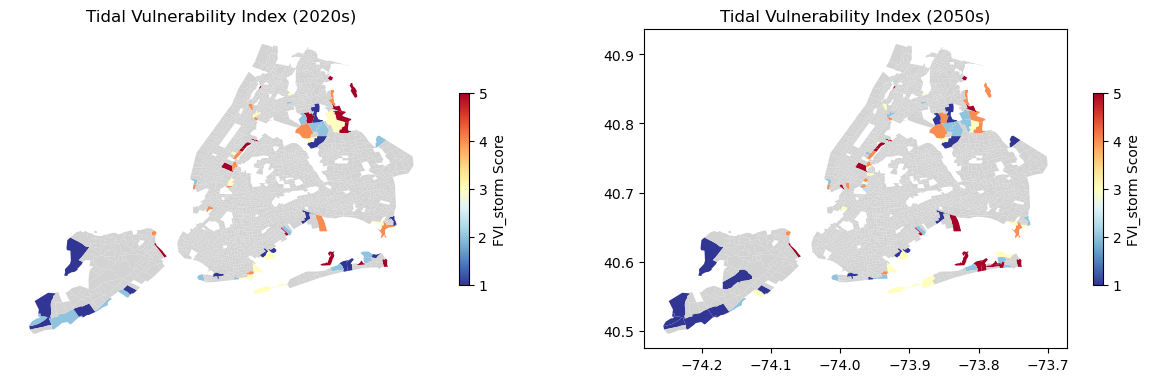

In [123]:


gdf = gpd.GeoDataFrame(df, geometry='geometry')

#plot!
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 25))

#2022
gdf.plot(column='FVI_tidal_2020s', ax=ax1, legend=True,
        legend_kwds={'label': 'FVI_storm Score', 'ticks': [1, 2, 3, 4, 5], 'shrink': 0.1},
        missing_kwds={'color': 'lightgrey'},
        cmap='RdYlBu_r')
ax1.set_title('Tidal Vulnerability Index (2020s)')
ax1.axis('off')

#2050
gdf.plot(column='FVI_tidal_2050s', ax=ax2, legend=True,
        legend_kwds={'label': 'FVI_storm Score', 'ticks': [1, 2, 3, 4, 5], 'shrink': 0.1},
        missing_kwds={'color': 'lightgrey'},
        cmap='RdYlBu_r')
ax2.set_title('Tidal Vulnerability Index (2050s)')
plt.show()


Key Findings:
- The most affected part is the Bronx riverside and the east side of Long Island.
- The Staten Island is generally at the lowest risk level and remains nearly unchanged.
- At the east side of Manhattan, there is a small area showing 4 and 5 level of FVI.

## 5. What factors contribute to the discrepancies between FSHRI and FVI?

#### Observations:
1. Staten Island: it remains at the same level.
2. Bay area at Brooklyn and Long Island: Scattered spots of high-level risks of flood by tide and storm around the bay area. And The west side of Long Island shows more regions with higher risk levels. Storms will cause more damage than tides will. 
3. Manhattan East Side: A small area shows 5-level of risk at the East river side.
4. The central part of Queens: The vulnerability related to tide and flood is less serious.

Here are some potential climatological and socioeconomic factors that are closely related with flood resiliency.

## (1) Storm distribution
Based on the simple observation, this study selects the storm events happening in 2024 to compare with the inclination of being affected by the storm. 

   YEARMONTH  EPISODE_ID  EVENT_ID  LOCATION_INDEX  RANGE AZIMUTH    LOCATION  \
0     202404      188809   1161227               1   0.90      SW  HAPPY TOWN   
1     202404      188809   1161228               1   0.00       N    COLUMBIA   
2     202404      188809   1161229               1   0.57       E    COLUMBIA   
3     202404      188809   1161230               1   0.96       S    BALLTOWN   
4     202404      188809   1161231               1   0.62       N    COLUMBIA   

   LATITUDE  LONGITUDE     LAT2     LON2  
0   33.9900    -81.090  3359400   815400  
1   34.0000    -81.020     3400   811200  
2   34.0000    -81.010     3400    81600  
3   33.5661    -81.730  3333966  8143800  
4   34.0090    -81.021    34540   811260  
--------------------------------------------------------------------------------


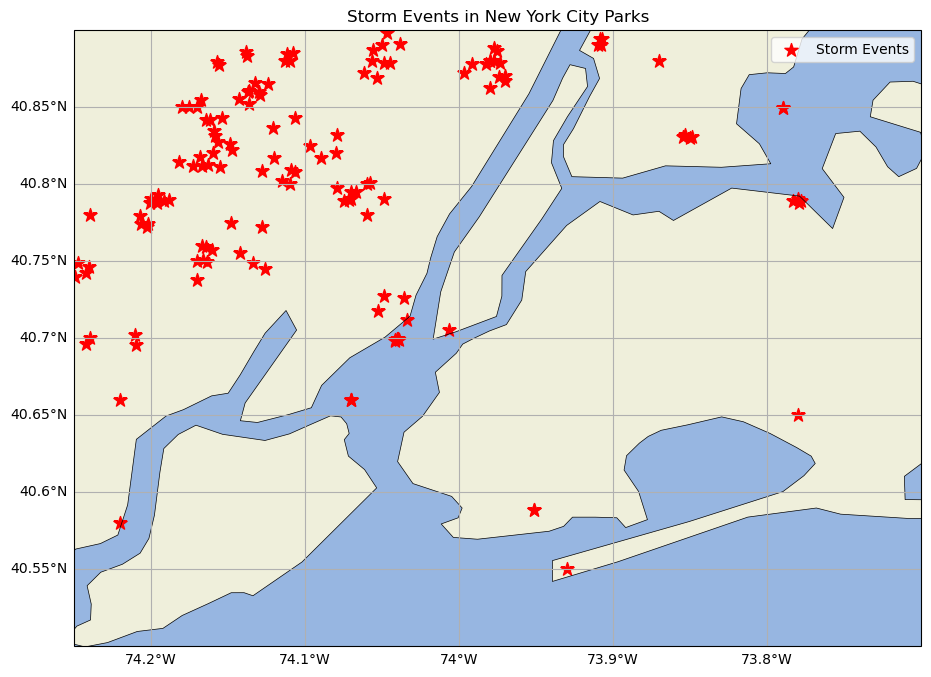

In [9]:
df_storm = pd.read_csv('StormEvents_locations-ftp_v1.0_d2024_c20241121.csv')
print(df_storm.head())

print('-'*80)

#plot!
fig, ax = plt.subplots(figsize=(12, 8),
                       subplot_kw={'projection': ccrs.PlateCarree()})


nyc_bounds = {
    'lon_min': -74.25,
    'lon_max': -73.7,
    'lat_min': 40.5,
    'lat_max': 40.9
}

nyc_storms = df_storm[
    (df_storm['LONGITUDE'] >= nyc_bounds['lon_min']) &
    (df_storm['LONGITUDE'] <= nyc_bounds['lon_max']) &
    (df_storm['LATITUDE'] >= nyc_bounds['lat_min']) &
    (df_storm['LATITUDE'] <= nyc_bounds['lat_max'])
]

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
#location of NYC
ax.scatter(nyc_storms['LONGITUDE'], nyc_storms['LATITUDE'],
          c='red', marker='*', s=100, label='Storm Events')

#the bound
ax.set_extent([
    nyc_bounds['lon_min'],
    nyc_bounds['lon_max'],
    nyc_bounds['lat_min'],
    nyc_bounds['lat_max']
])

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

plt.title('Storm Events in New York City Parks')
plt.legend()
plt.show()


### (2) Wetland

Wetland can act as a resilient screen for coastal flood invasion. 

From the dataset introduction:
- Emergent - vegetated wetland with no woody vegetation
- Forested - Trees make up the dominant vegetation of this wetland class
- Scrub/Shrub - woody vegetation that is less than 20 feet tall
- Water - open freshwater habitats, including streams, ponds, and lakes.
- Estuarine - This category includes all coastal and tidal wetlands in NYC.
- Water-Estuarine - This category describes all open water environments connected to the ocean.

Forested land, Emergent Wetlands, and scrub are more effective in resisting flood hazardous impact and play important role in recovery.

In [10]:
df_wetl = pd.read_csv('NYC_Wetlands_20241204.csv')
print(df_wetl.head())
print('-'*100)
print('Wetland types')
print(df_wetl['ClassName'])

     ClassName                 CreationDate                     EditDate  \
0     Emergent  2021-03-25 21:47:15.0000000  2021-04-09 22:12:11.0000000   
1     Emergent  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
2     Forested  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
3        Water  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   
4  Scrub/Shrub  2020-05-29 22:24:53.0000000  2020-05-29 22:24:53.0000000   

   OBJECTID               VerificationStatus  VerificationStatusYear  \
0      3187  Verified - Rapid Field Protocol                  2021.0   
1      3186                       Unverified                     NaN   
2      3185                       Unverified                     NaN   
3      3184                       Unverified                     NaN   
4      3183                       Unverified                     NaN   

                                               Shape  
0  MULTIPOLYGON (((-73.90001303589024 40.59534643...  


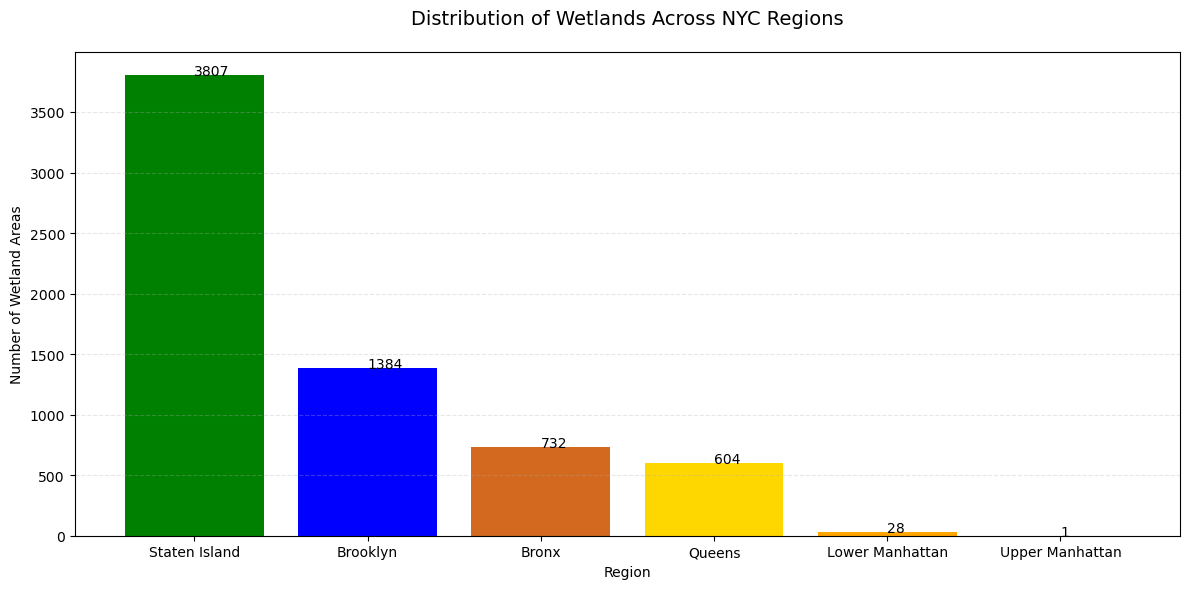

In [25]:

# try to extract the coordinates
def get_region(coord_str):
    try:
        coords = coord_str.strip('MULTIPOLYGON (((').split(' ')
        lon = float(coords[0])
        lat = float(coords[1].strip(','))
        
       
        if lon < -73.95:  # West label
            if lat > 40.8:
                return 'Upper Manhattan'
            elif lat > 40.7:
                return 'Lower Manhattan'
            else:
                return 'Staten Island'
        else:  # Eastern
            if lat > 40.8:
                return 'Bronx'
            elif lat > 40.7:
                return 'Queens'
            else:
                return 'Brooklyn'
    except:
        return 'Unknown'
#get the wetland and coresponding regional data
df_fr['Region'] = df_fr['Shape'].apply(get_region)
wet_counts = df_fr['Region'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(wet_counts.index, wet_counts.values,
               color=['green', 'blue', 'chocolate', 'gold', 'orange', 'purple'])

plt.title('Distribution of Wetlands Across NYC Regions', fontsize=14, pad=20)
plt.xlabel('Region')
plt.ylabel('Number of Wetland Areas')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,f'{int(height)}')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

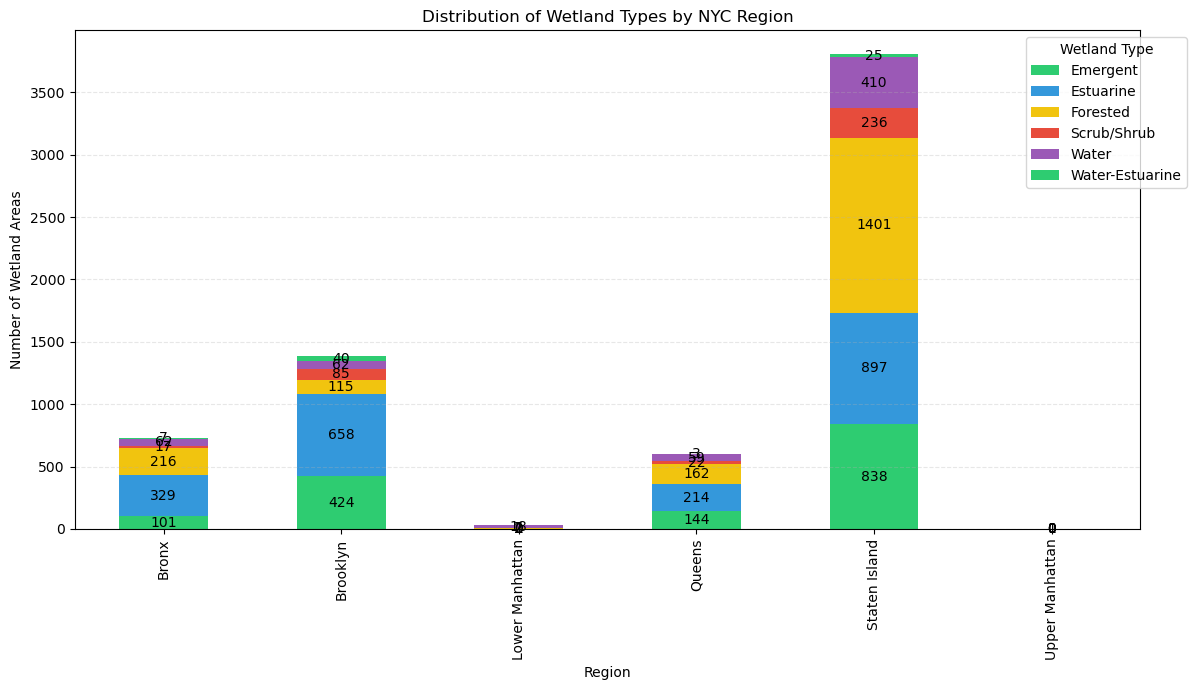


Numerical breakdown of wetland types by region:
ClassName        Emergent  Estuarine  Forested  Scrub/Shrub  Water  \
Region                                                               
Bronx                 101        329       216           17     62   
Brooklyn              424        658       115           85     62   
Lower Manhattan         1          2         7            0     18   
Queens                144        214       162           22     59   
Staten Island         838        897      1401          236    410   
Upper Manhattan         0          0         0            0      1   

ClassName        Water-Estuarine  
Region                            
Bronx                          7  
Brooklyn                      40  
Lower Manhattan                0  
Queens                         3  
Staten Island                 25  
Upper Manhattan                0  


In [35]:
wetland_by_region = pd.crosstab(df_fr['Region'], df_fr['ClassName'])

ax = wetland_by_region.plot(kind='bar', stacked=True, 
                           figsize=(12, 7),
                           color=['#2ecc71', '#3498db', '#f1c40f', '#e74c3c', '#9b59b6'])

plt.title('Distribution of Wetland Types by NYC Region')
plt.xlabel('Region')
plt.ylabel('Number of Wetland Areas')
plt.legend(title='Wetland Type', bbox_to_anchor=(1.05, 1))

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nNumerical breakdown of wetland types by region:")
print(wetland_by_region)

##### Key Findings
- Staten Island: it has the highest coverage areas of wetland. Forest (1401) and Emergent and Water-Estuarine (987+838) rank the top two in the total amount. This shows that the Staten Island has more wetland screening shield in the face of flooding, related to stronger recovery capacity.
- Brooklyn: Estuarine ranks the highest, accounting for 44.95%.
- Bronx: the total coverage and forest are generally lower. Since there is more vulnerble area at Bronx, the storm and tidal flood may have much more serious impact.

### (3) Housing construction

In this part, we can put more focus on 

In [11]:
df_house = pd.read_csv('Housing_Database_Project_Level_Files_20241204.csv')
print(df_house.head())

                                       the_geom Job_Number    Job_Type  \
0  POINT (985297.8340048924 208930.53629719163)  102484367  Alteration   
1  POINT (986751.1549503512 208000.04381757198)  102593276  Alteration   
2  POINT (985755.6128557435 202780.85836842714)  102653978  Alteration   
3   POINT (984775.502480652 202374.80487124692)  103053552  Alteration   
4  POINT (992919.8588253743 219613.21207445444)  103122256  Alteration   

     ResidFlag       NonresFlag                     Job_Status  CompltYear  \
0  Residential              NaN      5. Completed Construction      2010.0   
1  Residential  Non-Residential      5. Completed Construction      2015.0   
2  Residential              NaN      5. Completed Construction      2010.0   
3  Residential  Non-Residential      5. Completed Construction      2022.0   
4  Residential              NaN  3. Permitted for Construction         NaN   

   PermitYear  ClassAInit  ClassAProp  ...  Bldg_Class    CenTract10  \
0      2001.0 

/tmp/ipykernel_366/2565494563.py:1: DtypeWarning: Columns (1,22,28,29,30,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_house = pd.read_csv('Housing_Database_Project_Level_Files_20241204.csv')


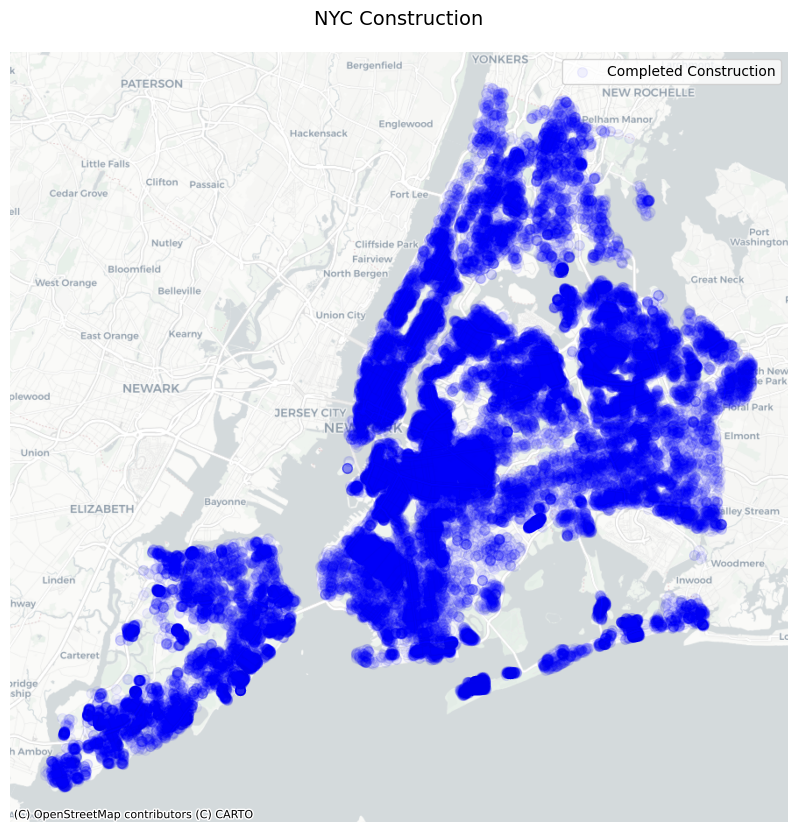

In [12]:
import contextily as ctx
import geopandas as gpd
from pyproj import CRS

df_complete = df_house[df_house['Job_Status'] == '5. Completed Construction']

fig, ax = plt.subplots(figsize=(15, 10))

x_coords = df_complete['the_geom'].str.extract(r'POINT \(([\d.]+)')[0].astype(float)
y_coords = df_complete['the_geom'].str.extract(r'POINT \([\d.]+ ([\d.]+)')[0].astype(float)

gdf = gpd.GeoDataFrame(
    df_complete, 
    geometry=gpd.points_from_xy(x_coords, y_coords),
    crs=CRS('EPSG:2263') 
)

gdf = gdf.to_crs(epsg=3857)

# Plot points
gdf.plot(ax=ax, 
         color='blue',
         alpha=0.05,
         markersize=50,
         label='Completed Construction')

# Add OSM base map - I searched from websites
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('NYC Construction', fontsize=14, pad=20)
plt.legend()
plt.axis('off')
plt.show()

This map is the the distribution of completed construction sites in recent 10 years up to 2024, which can also reflect the city sprawling trend and the population density in recent years. 

## 6. Results

To test the hypothesis based on the above findings:

### (1) ESFRI and FVI features
- For the majority of places, the vulnerability and recovery capacity is consistent with the vulnerability level related to storms and tides. However, in some areas, the vulnerabilities can be attributed to less wetland coverage, coastal proximity, or even the completeness of sewage system. 
- The ESFRI value can be influenced by diverse factors not only the climatological factors.

### (2) The location of storms does not determine the vulnerability.
- In the graph, most storms happened in New Jersey. In New York, there are seldom storm events last year and the storms location does not necessarily correlation with it.
- The coastal area in the south part of Brooklyn and in the south part of Bronx can be more vulnerable. Queens's vulnerability is related with the storm events.


### (3) The effect of wetland shield
- Staten Island has the lowest level in general with less influence from storm. It also has the highest density and diversity level of wetlands, which can act as filtration towards flood. This enhances the resiliency towards the flood, reflecting low level of FSHRI score.
- Bronx and Queens have low coverage of wetland and similar density of constrution compared to other regions. 


## 7. Limitations

- It is more convincing to conduct a statistical correlation between the wetland coverage and the high risk of FSHRI within the vulnerable areas affected by storm or tidal events. However, it is complicated to manipulate the location data from a map, which was originally a shapefile. There is also the same situation for storm distribution.
- It is also worth exploring that some other climatological factors such as wind speed, precipitation, and can also have an impact on city's flood resilience.
- Creating buffer overlapping areas can have a stronger visualization effect.
- More socioeconomic factors can be included. However, due to the lack of adequate data sources, the study may need more original data to complete the whole research.
